In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('Data/TenthCircuit.csv')
df.head()
df.shape

(954, 10)

In [6]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,2016-12-06,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII


<AxesSubplot:xlabel='Date'>

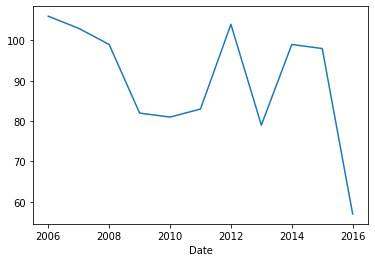

In [8]:
df.groupby(df['Date'].dt.year)['Issue'].sum().plot()

<AxesSubplot:xlabel='Category'>

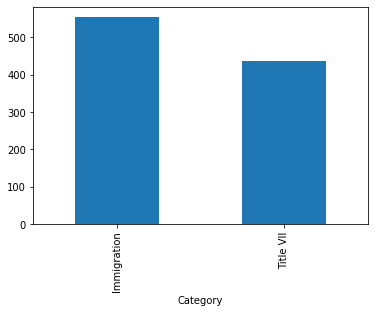

In [14]:
df.groupby(df['Category'])['Issue'].sum().plot(kind='bar')

In [9]:
df_1 = df[((df['Vote1'] == 1) & (df['Vote2'] == 1) & (df['Vote3'] == 1)) | (
            (df['Vote1'] == 0) & (df['Vote2'] == 0) & (df['Vote3'] == 0))]
df_1.shape

(934, 10)

In [15]:
df_1['on1'] = np.where(((df_1['Vote1'] == 1) & (df_1['Vote2'] == 1) & (df_1['Vote3'] == 1)), 1, 0)

C:\Temp/ipykernel_3800/2029753190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['on1'] = np.where(((df_1['Vote1'] == 1) & (df_1['Vote2'] == 1) & (df_1['Vote3'] == 1)), 1, 0)


<AxesSubplot:xlabel='Category,on1'>

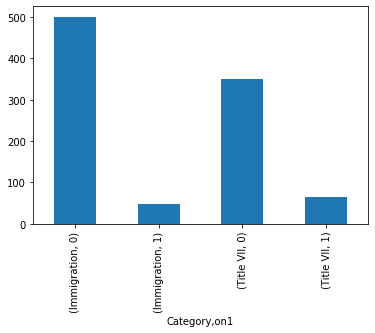

In [19]:
df_1.groupby(['Category', 'on1'])['Issue'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

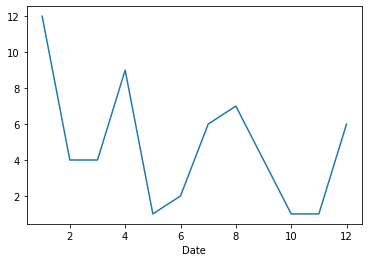

In [25]:
df[df['Date'].dt.year == 2016].groupby(df['Date'].dt.month)['Issue'].sum().plot()

KeyError: "None of [DatetimeIndex(['2016-12-21', '2016-12-21', '2016-12-14', '2016-12-06',\n               '2016-11-15', '2016-10-13', '2016-08-11', '2016-08-08',\n               '2016-08-02', '2016-07-21',\n               ...\n               '2006-03-02', '2006-02-27', '2006-02-23', '2006-02-07',\n               '2006-02-02', '2006-01-31', '2006-01-24', '2006-01-24',\n               '2006-01-18', '2006-01-09'],\n              dtype='datetime64[ns]', length=954, freq=None)] are in the [columns]"

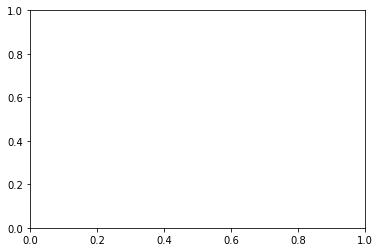

In [27]:
# del df['Only_1or0']
df.plot.scatter(x=df['Date'], y=df['Issue'])

In [30]:
def get_seasons(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8, ]:
        return 'Summer'
    else:
        return 'Autumn'

In [34]:
df['Season'] = df['Date'].dt.month.apply(get_seasons)
df


,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,Season
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,Winter
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,Winter
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,Winter
3,Dye v. Moniz,2016-12-06,1,Lucero,Holmes,Moritz,0,0,0,Title VII,Winter
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
949,Haimour v. Gonzales,2006-01-31,1,Henry,McKay,Murphy,0,0,0,Immigration,Winter
950,Infanzon v. Gonzales,2006-01-24,1,Henry,McKay,Murphy,0,0,0,Immigration,Winter
951,Otero v. Gonzales,2006-01-24,1,Tymkovich,Porfilio,Baldock,0,0,0,Immigration,Winter
952,Infanzon v. Comfort,2006-01-18,1,Briscoe,Lucero,Murphy,0,0,0,Immigration,Winter


<AxesSubplot:xlabel='Season'>

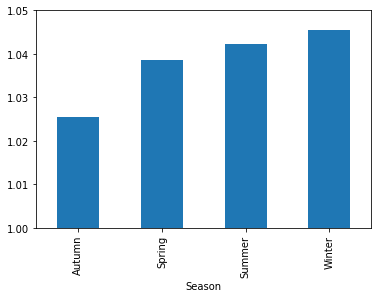

In [36]:
df.groupby('Season')['Issue'].mean().plot.bar(ylim=[1.0, 1.05])

In [51]:
df_2 = df[df['Category'] == 'Immigration']


In [59]:
df_2.groupby(['Judge1', 'Judge2', 'Judge3'])['Issue'].sum().sort_values(ascending=False)

Judge1     Judge2     Judge3   
Lucero     Porfilio   Brorby       9
Kelly      Porfilio   Matheson     6
Lucero     Tymkovich  Holmes       6
Kelly      McKay      O'Brien      5
Tymkovich  Holloway   Matheson     5
                                  ..
Kelly      Holloway   Matheson     1
           McConnell  Tymkovich    1
           McKay      Hartz        1
                      Lucero       1
Tymkovich  Seymour    Baldock      1
Name: Issue, Length: 262, dtype: int64

In [50]:
df.groupby('Title')[['Judge1', 'Judge2', 'Judge3', 'Vote1', 'Vote2', 'Vote3']].sum()

,Vote1,Vote2,Vote3
Title,,,
Abajue v. Holder,0,0,0
Abiodun v. Gonzales,0,0,0
Adam v. Holder,0,0,0
Adam v. Lynch,0,0,0
"Adamson v. Multi Community Diversified Services, Inc.",0,0,0
...,...,...,...
Zokari v. Gates,0,0,0
Zorig v. Holder,0,0,0
Zoutomou v. Copper,0,0,0


<AxesSubplot:xlabel='Date'>

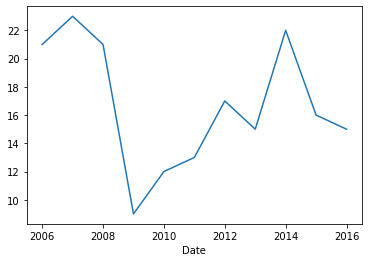

In [63]:
df_3 = df[(df['Judge1'] == 'Lucero') |
          (df['Judge2'] == 'Lucero') |
          (df['Judge3'] == 'Lucero')]
df_3.groupby(df_3['Date'].dt.year)['Issue'].sum().plot()